In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/ageinc.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


**Performing Mean-Shift Clustering to Cluster Data**

Standardize the data

In [3]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [4]:
df.head()

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064


Perform mean-shift clustering



In [5]:
#save the standardized columns to X
X = df[zcols]

In [6]:
#use estimate_bandwidth function to estimate the best bandwidth to use, with a quantile parameter set to 0.1
bandwidth = cluster.estimate_bandwidth(X, quantile = 0.1)

In [7]:
#train the model with the estimate bandwidth, adn set bin_Seeding to true (speeds up algorithm)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

#fit the model to the data
ms.fit(X)

MeanShift(bandwidth=0.636820406937075, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [8]:
#print the resulting number of clusters by finding the number of unique labels that mean-shift clustering has created
df['cluster'] = ms.labels_
print("Number of clusters: %d" % len(df['cluster'].unique()))

Number of clusters: 4


Plot clusterig in Matplotlib

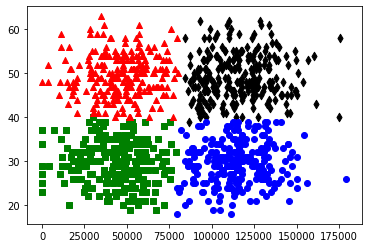

In [10]:
#define colors and shapes used for each cluster for visualization

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        plt.scatter(d['income'], d['age'], marker=markers[c], color=colors[c])    

plt.show()

**Examine Cluster Characteristics**

In [12]:
df['cluster'] = ms.labels_
df.head()

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,0
3,33223,49,-1.194372,0.873660,0
4,72994,53,-0.181416,1.238064,0


In [15]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/exercise16clusters.csv')

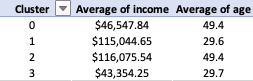

Used a PivotTable in Excel to easy visualize the cluster characteristics. 

The clusters are as follows: 


*   Cluster 0 - Lower avg income, older avg age
*   Cluster 2 - Higher avg income, older avg age
* Cluster 3 - Lower avg income, younger avg age
* Cluster 1 - Higher avg income, younger avg age

